Import Tenser flow layers, model and dataset

In [25]:
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

Load data set in traning and testing

In [16]:
(X_train , Y_train) , (X_test, Y_test) = mnist.load_data()

Import library for showing data 


In [8]:
import matplotlib.pyplot as plt

Show Some Data

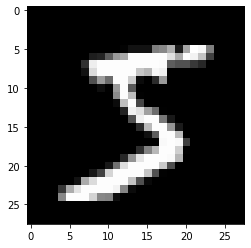

In [10]:
plt.imshow(X_train[0], cmap = 'gray')

In [14]:
print(Y_train[0])

5


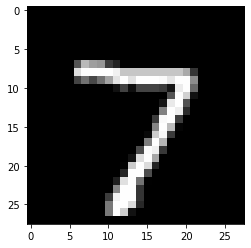

In [11]:
plt.imshow(X_test[0], cmap = 'gray')

In [17]:
print(Y_test[0])

7


Normaliz data

In [18]:
X_train = X_train /  255
X_test = X_test / 255

In [29]:
X_train.shape

(60000, 784)

In [28]:
X_test.shape

(10000, 784)

Reshape data

In [22]:
X_train = X_train.reshape((X_train.shape[0],784)).astype('float32')
X_test = X_test.reshape((X_test.shape[0],784)).astype('float32')

In [27]:
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

Create model

In [23]:
model = Sequential()

In [31]:
model.add(Dense(64, activation='relu', input_dim= 784 ))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

Import Optimizer

In [34]:
from tensorflow.keras.optimizers import Adam

In [35]:
optimiz = Adam(lr= 1e-3)

Compile model 

In [40]:
model.compile(loss='categorical_crossentropy', optimizer= optimiz , metrics = ['accuracy'])

In [41]:
  model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train Model

In [42]:
model.fit(X_train, Y_train, epochs= 10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.4685 - accuracy: 0.8616
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1778 - accuracy: 0.9476
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1319 - accuracy: 0.9602
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1081 - accuracy: 0.9672
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0907 - accuracy: 0.9719
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9767
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9791
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9816
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0516 - accuracy: 0.9847
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9861

Check Score on  testing 

In [43]:
score = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9727


In [44]:
score

[0.09477315098047256, 0.9726999998092651]

Score on testing

In [45]:
print('%.2f%%' % (100-score[0] *100))

90.52%


Save Model 

In [47]:
model.save('mnist.h5')